<h1><center>Análisis de Sistemas de Infraestructura <br>
    Examen Final </center></h1>

In [1]:
#Librerias
import pandas as pd #Libreria para manejo de datos y estadistica
import matplotlib.pyplot as plt # importar librería de matplotlib
import numpy as np
import math
import seaborn as sns
import scipy as sp
import scipy.stats as ss
%matplotlib inline

<h2>Punto 1

Considere un sistema que no se interviene y se abandona una vez ocurre la falla. Las fallas del sistema son catastróficas y ocurren con una tasa $\lambda=0.1$. El costo de construcción es de $C_0=10^5$, los beneficios $b=0.275C_0$ y el costo de la falla $C_L=1.25C_0$. 

i) Encuentre el valor esperado del VPN descontado para el siguiente conjunto de tasas de descuento (en \%) $\gamma =\{1, 5, 10, 15, 25\}$.

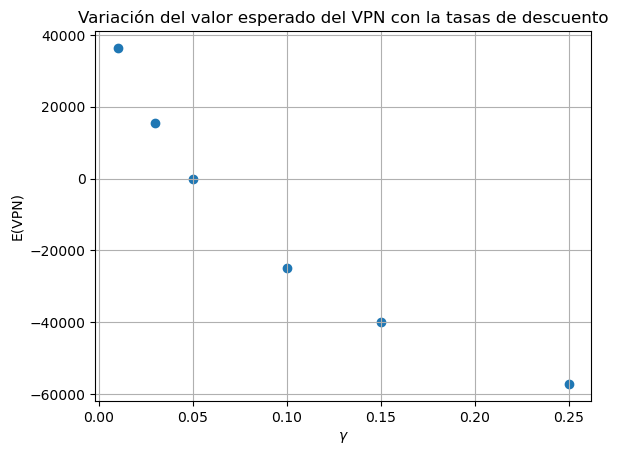

In [2]:
tasas = np.array([1/100,3/100,5/100,10/100,15/100,25/100])
Co = 10**5
b = 0.275*Co
CL =  1.25*Co
lambd = 0.1

EVPN = b/(tasas+lambd) - Co - CL*( lambd/(tasas+lambd) )

plt.scatter(tasas,EVPN)
plt.title('Variación del valor esperado del VPN con la tasas de descuento')
plt.ylabel('E(VPN)')
plt.xlabel(r'$\gamma$')
plt.grid()

ii) Cómo cambian los resultados si $\lambda$ cambia? 

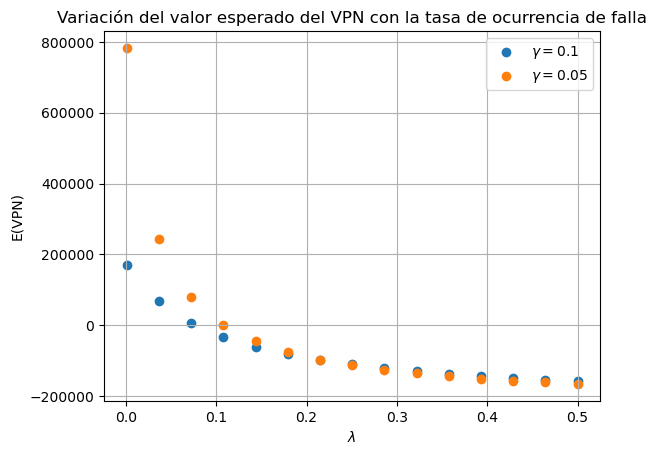

In [3]:
lambd = np.linspace(0.001,0.50,15)
Co = 10**5
b = 0.275*Co
CL =  1.25*Co
tasa = 0.1
tasa2 = 0.03

EVPN1 = b/(tasa+lambd) - Co - CL*( lambd/(tasa+lambd) )
EVPN2 = b/(tasa2+lambd) - Co - CL*( lambd/(tasa2+lambd) )

plt.scatter(lambd,EVPN1,label=r'$\gamma = 0.1$')
plt.scatter(lambd,EVPN2,label=r'$\gamma = 0.05$')
plt.title('Variación del valor esperado del VPN con la tasa de ocurrencia de falla')
plt.ylabel('E(VPN)')
plt.xlabel(r'$\lambda$')
plt.legend()
plt.grid()

Recuerde que...
<br>
\begin{equation}
{\mathbb{E}[VPN]}=\frac{b}{\gamma+\lambda}-C_{0}-C_{L}{\frac{\lambda}{\gamma+\lambda}}
\end{equation}

<h2>Punto 2

Considere un sistema cuyo estado inicial es $v_0=100$; el sistema se considera funcional si está por encima de $V(t)=25$. El sistema está expuesto a eventos súbitos (shocks) que ocurren aleatoriamente en el tiempo, $X$, y cuyo tamaño, $Y$, también es aleatorio. La distribución de $X$ es exponencial con parámetro $\lambda=0.1$; por su parte, la distribución de  $Y$ es lognormal con $\mu_Y=10$ y COV$_Y=0.30$. Los shocks $Y$ son iid y el daño se acumula en el tiempo. Considere que si el sistema falla (i.e., cae por debajo de $V(t)\leq 25$) se abandona. Para modelar el comportamiento puede utilizar simulaciones de Monte Carlo; el procedimiento general es el siguiente:

a) Defina un vector de $n$ (e.g., $n>100$) tiempos aleatorios a los cuales ocurren los shocks -los ${\hat x}_i$ se obtienen a partir de la distribución de $X$. Note que hay una expresión analítica. Los tiempos se calculan como $T_i=\sum X_i$.

In [4]:
# Tiempo
lambda_punto2 = 0.1

def tiempos():
    n=[] # Cada uno de los xi
    Ti=[] # Tiempos
    for i in range(0,100):
        n.append(np.random.exponential(1/lambda_punto2))
        Ti.append(sum(n))
    return Ti

b) Genere ahora $n$ shocks; i.e., valores aleatorios de $Y$ generados a partir de la distribución de $Y$ (Python, Matlab, Excel tienen esta función integrada).

In [5]:
# Parametros lognormal
mu_y=10
COV_y=0.30
desv_y=COV_y*mu_y
xi2=np.log(1+desv_y**2)
xi=math.sqrt(xi2)
lamb_y=np.log(mu_y)-0.5*xi2
Y=np.random.lognormal(lamb_y,xi,100)

c) Sume los shocks hasta que $\sum Y_i\leq 25$, encuentre el tiempo asociado a esta falla.

In [6]:
# Funcion que halla el tiempo a la falla para un vector Y y X particular
def tf(Y,Ti):
    v0=100
    k=25
    deterioro=0
    tf_rta = 10000000
    for t in range(0,100):
        if v0-deterioro<=25:
            tf_rta = Ti[t]
            break
        else:
            deterioro=deterioro+Y[t] #Acumula deterioro
    return tf_rta

In [7]:
# Proceso iterativo - halla el MTTF utilizando la función anterior con Y y X aleatorios
suma=0

n_it = 10000

tiempo_falla = []

for i in range(0,n_it):
    
    suma=suma+tf(np.random.lognormal(lamb_y,xi,100),tiempos())
    
    tiempo_falla.append(tf(np.random.lognormal(lamb_y,xi,100),tiempos()))
    
MTTF=suma/n_it

print('El MTTF es', round(MTTF,2))

El MTTF es 116.78


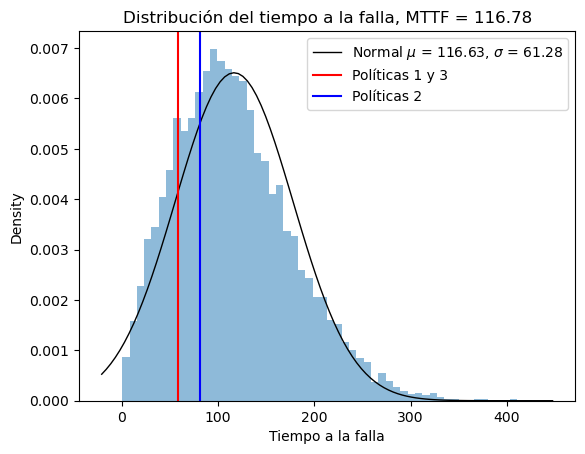

In [8]:
TMF = pd.DataFrame(tiempo_falla)

sns.histplot(TMF, kde=False, stat="density", linewidth=0)

# Plot norm PDF.
mu, std = ss.norm.fit(TMF)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = ss.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1, label = r'Normal $\mu$ = {}, $\sigma$ = {}'.format(round(mu,2),round(std,2)))
plt.xlabel('Tiempo a la falla')
plt.legend()
plt.axvline(0.5*MTTF, label = 'Políticas 1 y 3', c='r')
plt.axvline(0.7*MTTF, label = 'Políticas 2', c = 'b')
plt.legend()
plt.title('Distribución del tiempo a la falla, MTTF = {}'.format(round(MTTF,2)))
plt.show()

Con el fin de garantizar que el sistema esté funcionando, se quieren evaluar varias polÌticas de mantenimiento; estas son:

I. Intervenciones periódicas que llevan el sistema hasta  as good as new (estado al tiempo $t=0$) y que ocurren a tiempos $t_{m_i}=0.5M_f$;\\

In [9]:
tm_politicas1y3=round(0.5*MTTF)

II. Intervenciones periódicas que llevan el sistema hasta it as good as new y que ocurren a tiempos $t_{m_i}=0.75M_f$;\\

In [10]:
tm_politica2=round(0.75*MTTF)

III. Intervenciones periódicas como en el primer caso pero donde las intervenciones no llevan el sistema hasta as good as new sino hasta $v_i=1.25v_{i-1}$. En caso de que al aplicar esta política $v_i>100$ llevar el sistema solo hasta as good as new, es decir $v_i$ no debe ser en ningún caso mayor que $v_0$.

In [11]:
tm_politicas1y3=round(0.5*MTTF)

- El valor esperado del valor presente neto del costo de mantenimiento si se aplica una tasa de descuento del 5\%. Concluya.

In [12]:
# Para la politica 1
def tf_p1_costo(Y,Ti):
    costo=0
    v0=100
    k=25
    deterioro=0
    count_man = 1
    tf_rta = 1000000
    for t in range(0,100):
        if v0-deterioro<=25:
            tf_rta = Ti[t]
            break
        else:
            deterioro=deterioro+Y[t] #Acumula deterioro
        if t>0:
            if Ti[t-1] < tm_politicas1y3*count_man and Ti[t] >= tm_politicas1y3*count_man:
                costo = costo + deterioro*10/(1+0.05)**(count_man*tm_politicas1y3) # El costo es proporcional al tamaño del mantenimiento, 10 unidades por cada unidad reparada en el sistema
                deterioro = 0  
                count_man = count_man + 1
    return costo, tf_rta, count_man

# Proceso iterativo
suma=0
n_it = 10000
suma_paraMTTF_p1=0

for i in range(0,n_it):
    realizacion = tf_p1_costo(np.random.lognormal(lamb_y,xi,100),tiempos())
    suma = suma + realizacion[0]
    suma_paraMTTF_p1 = suma_paraMTTF_p1 + realizacion[1]
Costo_p1=suma/n_it

print('El costo descontado para la politica 1 es', round(Costo_p1,2))

El costo descontado para la politica 1 es 19.55


In [13]:
# Para la politica 2
def tf_p2_costo(Y,Ti):
    costo=0
    v0=100
    k=25
    deterioro=0
    count_man = 1
    tf_rta = 1000000
    for t in range(0,100):
        if v0-deterioro<=25:
            tf_rta = Ti[t]
            break
        else:
            deterioro=deterioro+Y[t] #Acumula deterioro
        if t>0:
            if Ti[t-1] < tm_politica2*count_man and Ti[t] >= tm_politica2*count_man:
                costo = costo + deterioro*10/(1+0.05)**(count_man*tm_politica2)
                deterioro=0 
                count_man = count_man + 1
    return costo, tf_rta

# Proceso iterativo
suma=0
suma_paraMTTF_p2 = 0

for i in range(0,n_it):
    realizacion = tf_p2_costo(np.random.lognormal(lamb_y,xi,100),tiempos())
    suma=suma + realizacion[0]
    suma_paraMTTF_p2 = suma_paraMTTF_p2 + realizacion[1]
Costo_p2=suma/n_it

print('El valor esperado del costo descontado para la politica 2 es', round(Costo_p2,2))

El valor esperado del costo descontado para la politica 2 es 4.02


In [14]:
# Para la politica 3
def tf_p3_costo(Y,Ti):
    costo = 0
    v0 = 100
    k = 25
    deterioro = 0
    count_man = 1
    tf_rta = 1000000
    for t in range(0,100):
        if v0-deterioro<=25:
            tf_rta = Ti[t]
            break
        else:
            deterioro = deterioro + Y[t] #Acumula deterioro
        if t>0:
            if Ti[t-1] < tm_politicas1y3*count_man and Ti[t] >= tm_politicas1y3*count_man:
                
                v0_n = (v0 - deterioro + Y[t])*1.25
                
                if v0_n>100:
                    v0_n=100
                    
                costo=costo + (v0_n-(v0-deterioro))*10/(1+0.05)**(tm_politicas1y3*count_man)
                deterioro = Y[t]
                v0=v0_n
                count_man = count_man + 1
    return costo, tf_rta

# Proceso iterativo
suma=0
suma_paraMTTF_p3 = 0

for i in range(0,n_it):
    realizacion = tf_p3_costo(np.random.lognormal(lamb_y,xi,100),tiempos())
    suma=suma + realizacion[0]
    suma_paraMTTF_p3 = suma_paraMTTF_p3 + realizacion[1]
Costo_p3=suma/n_it
print('El valor esperado del costo descontado para la politica 3 es', round(Costo_p3,2))

El valor esperado del costo descontado para la politica 3 es 11.14


El valor esperado del costo por unidad de tiempo de las intervenciones de cada política si se aplica una tasa de descuento del 5\%?

In [15]:
Costop1_t=Costo_p1/tm_politicas1y3 # Politica 1
Costop2_t=Costo_p2/tm_politica2 # Politica 2
Costop3_t=Costo_p3/tm_politicas1y3 # Politica 3
print('El valor esperado del costo descontado por unidad de tiempo para la politica 1 es', round(Costop1_t,3))
print('El valor esperado del costo descontado por unidad de tiempo para la politica 2 es', round(Costop2_t,3))
print('El valor esperado del costo descontado por unidad de tiempo para la politica 3 es', round(Costop3_t,3))

El valor esperado del costo descontado por unidad de tiempo para la politica 1 es 0.337
El valor esperado del costo descontado por unidad de tiempo para la politica 2 es 0.046
El valor esperado del costo descontado por unidad de tiempo para la politica 3 es 0.192


In [16]:
Costop1_t=Costo_p1/(suma_paraMTTF_p1/n_it) # Politica 1
Costop2_t=Costo_p2/(suma_paraMTTF_p2/n_it) # Politica 2
Costop3_t=Costo_p3/(suma_paraMTTF_p3/n_it) # Politica 3
print('El valor esperado del costo descontado por unidad de tiempo para la politica 1 es', round(Costop1_t,4))
print('El valor esperado del costo descontado por unidad de tiempo para la politica 2 es', round(Costop2_t,4))
print('El valor esperado del costo descontado por unidad de tiempo para la politica 3 es', round(Costop3_t,4))

El valor esperado del costo descontado por unidad de tiempo para la politica 1 es 0.0007
El valor esperado del costo descontado por unidad de tiempo para la politica 2 es 0.0007
El valor esperado del costo descontado por unidad de tiempo para la politica 3 es 0.0775


- Cuando sea posible calcule el tiempo medio a la falla; si no es posible explique.

In [17]:
print('El MTTF para la politica 1 es', round(suma_paraMTTF_p1/n_it,2)) # Tiene sentido? qué está pasando? en verdad esto es el MTTF? - analizar

El MTTF para la politica 1 es 26554.46


In [18]:
print('El MTTF para la politica 2 es', round(suma_paraMTTF_p2/n_it,2)) # Tiene sentido? qué está pasando? en verdad esto es el MTTF? - analizar

El MTTF para la politica 2 es 5599.69


In [19]:
print('El MTTF para la politica 3 es', round(suma_paraMTTF_p3/n_it,2)) # Tiene sentido? qué está pasando? en verdad esto es el MTTF? - analizar

El MTTF para la politica 3 es 143.78


<h2>Punto 3

Considere un sistema que  cuyo comportamiento en el tiempo se modela en un espacio discreto utilizando Cadenas de Markov. El conjunto de posibles estados del sistema es: ${\bf S}=\{1,2,3,4,5\}$ donde 1 indica que el sistema está funcionando en perfecto estado y 5 que ha fallado. 
 
Considere las  matrices de transición anual entre estados que se presentan a continuación. La primera fila corresponde al estado 1 y la última al estado 5.

\begin{equation}
{\bf P}_1=\left[
\begin{matrix}
0.4 & 0.3 & 0.2 & 0.075 & 0.025\\
0.3 & 0.5 & 0.1 & 0.075 & 0.025\\
0.2 & 0.1 & 0.6 & 0.075 & 0.025\\
0.075 & 0.025 & 0.1 & 0.7 & 0.1\\
0.025 & 0.075 & 0.1 & 0.3 & 0.5\\
\end{matrix}\right]
\end{equation}

\begin{equation}
{\bf P}_2=\left[
\begin{matrix}
0.5 & 0.3 & 0.1 & 0.075 & 0.025\\
0 & 0.6 & 0.3 & 0.075 & 0.025\\
0 & 0 & 0.8 & 0.175 & 0.025\\
0 & 0 & 0 & 0.975 & 0.025\\
0 & 0 & 0 & 0 & 1\\
\end{matrix}\right]
\end{equation}

\begin{equation}
{\bf P}_3=\left[
\begin{matrix}
0.5 & 0.3 & 0.1 & 0.075 & 0.025\\
0 & 0.6 & 0.3 & 0.075 & 0.025\\
0 & 0 & 0.8 & 0.175 & 0.025\\
0 & 0 & 0 & 0.975 & 0.025\\
1 & 0 & 0 & 0 & 0\\
\end{matrix}\right]
\end{equation}

Bajo el supuesto de que el estado inicial del sistema es ${\bf p}^0=\{1,0,0,0,0\}$, determine  La probabilidad de que que el sistema esté en cada estado después de 5, 10, 25 y 50 años para los siguientes casos (para cada caso, seleccione la matriz correcta y justifique su elección):

- El sistema solo puede permanecer en su estado inicial o deteriorarse (seleccione la matriz de transición adecuada).

In [20]:
p0=[1,0,0,0,0]
print(p0)

[1, 0, 0, 0, 0]


In [21]:
# Escriba acá la matriz seleccionada en este caso
matrix_2=([[0.5,0.3,0.1,0.075,0.025],
           [0.0,0.6,0.3,0.075,0.025],
           [0.0,0.0,0.8,0.175,0.025],
           [0.0,0.0,0.0,0.975,0.025],
           [0.0,0.0,0.0,0.000,1.000] ])

Recuerde que para elevar matrices a una potencia puede utilizar "np.linalg.matrix_power" y para multiplicación de arrays "np.matmul". Como resultado organizado puede entregar una tabla con indice "['5 years later','10 years later','25 years later','50 years later']" y columnas ['Estado 1','Estado 2','Estado 3','Estado 4','Estado 5']

In [22]:
matriz_transicion_array=np.array(matrix_2)

P1_A =np.linalg.matrix_power(matriz_transicion_array, 1)
P5_A =np.linalg.matrix_power(matriz_transicion_array, 5)
P10_A=np.linalg.matrix_power(matriz_transicion_array, 10)
P25_A=np.linalg.matrix_power(matriz_transicion_array, 25)
P50_A=np.linalg.matrix_power(matriz_transicion_array, 50)
P70_A=np.linalg.matrix_power(matriz_transicion_array, 70)
P100_A=np.linalg.matrix_power(matriz_transicion_array, 100)
P120_A=np.linalg.matrix_power(matriz_transicion_array, 120)

p1_A = np.matmul(p0,P1_A)
p5_A =np.matmul(p0,P5_A)
p10_A=np.matmul(p0,P10_A)
p25_A=np.matmul(p0,P25_A)
p50_A=np.matmul(p0,P50_A)
p70_A=np.matmul(p0,P70_A)
p100_A=np.matmul(p0,P100_A)
p120_A=np.matmul(p0,P120_A)

df_Punto2 = pd.DataFrame([p1_A],columns=[1,2,3,4,5])
df_Punto2.loc[1]=p5_A
df_Punto2.loc[2]=p10_A
df_Punto2.loc[3]=p25_A
df_Punto2.loc[4]=p50_A
df_Punto2.loc[5]=p70_A
df_Punto2.loc[6]=p100_A
df_Punto2.loc[7]=p120_A

df_Punto2.index=['1 year later','5 years later','10 years later','25 years later','50 years later','70 years later',
                 '100 years later','120 years later']

df_Punto2

,1,2,3,4,5
1 year later,5.000000e-01,3.000000e-01,1.000000e-01,0.075000,0.025000
5 years later,3.125000e-02,1.395300e-01,3.341600e-01,0.376156,0.118904
10 years later,9.765625e-04,1.521017e-02,1.722471e-01,0.587896,0.223670
25 years later,2.980232e-08,8.439679e-06,6.913423e-03,0.524104,0.468974
50 years later,8.881784e-16,2.424577e-11,2.616617e-05,0.281962,0.718012
70 years later,8.470329e-22,8.865588e-16,3.016758e-07,0.169950,0.830049
100 years later,7.888609e-31,1.959956e-22,3.734566e-10,0.079517,0.920483
120 years later,7.523164e-37,7.165909e-27,4.305661e-12,0.047924,0.952076


- Cuando el sistema alcanza los estados 1 y 2 se considera que su operación no es apropiada. 

In [23]:
# Escriba acá la matriz seleccionada en este caso
matrix_1=([[0.4,0.3,0.2,0.075,0.025],
           [0.3,0.5,0.1,0.075,0.025],
           [0.2,0.1,0.6,0.075,0.025],
           [0.075,0.025,0.1,0.7,0.1],
           [0.025,0.075,0.1,0.3,0.5] ])

matrix_3=([[0.5,0.3,0.1,0.075,0.025],
           [0.0,0.6,0.3,0.075,0.025],
           [0.0,0.0,0.8,0.175,0.025],
           [0.0,0.0,0.0,0.975,0.025],
           [1.0,0.0,0.0,0.000,0.000] ])

Recuerde que para elevar matrices a una potencia puede utilizar "np.linalg.matrix_power" y para multiplicación de arrays "np.matmul". Como resultado organizado puede entregar una tabla con indice "['5 years later','10 years later','25 years later','50 years later']" y columnas ['Estado 1','Estado 2','Estado 3','Estado 4','Estado 5']

In [24]:
#Forma principal de calcular la probabilidad de falla

prob_falla_1=np.zeros(50)
tiempo=0
while tiempo<50:
    prob_falla_1[tiempo]=np.matmul(p0,np.linalg.matrix_power(matrix_1, tiempo))[3]+np.matmul(p0,np.linalg.matrix_power(matrix_1, tiempo))[4]
    tiempo+=1
    
prob_falla_2=np.zeros(50)
tiempo=0
while tiempo<50:
    prob_falla_2[tiempo]=np.matmul(p0,np.linalg.matrix_power(matrix_2, tiempo))[3]+np.matmul(p0,np.linalg.matrix_power(matrix_2, tiempo))[4]    
    tiempo+=1
    
    
prob_falla_3=np.zeros(50)
tiempo=0
while tiempo<50:
    prob_falla_3[tiempo]=np.matmul(p0,np.linalg.matrix_power(matrix_3, tiempo))[3]+np.matmul(p0,np.linalg.matrix_power(matrix_3, tiempo))[4]
    tiempo+=1

- Dibuje la curva que muestra la probabilidad de que el sistema esté en alguno de estos estados a través del tiempo para las tres matrices de transición. Explique las diferencias.

In [25]:
#Otra forma de calcular la probabilidad de falla

#Matriz 1

matriz_transicion_array=np.array(matrix_1)

P5_A =np.linalg.matrix_power(matriz_transicion_array, 5)
P10_A=np.linalg.matrix_power(matriz_transicion_array, 10)
P25_A=np.linalg.matrix_power(matriz_transicion_array, 25)
P50_A=np.linalg.matrix_power(matriz_transicion_array, 50)

p5_A =np.matmul(p0,P5_A)
p10_A=np.matmul(p0,P10_A)
p25_A=np.matmul(p0,P25_A)
p50_A=np.matmul(p0,P50_A)

df_Punto1 = pd.DataFrame([p5_A],columns=[1,2,3,4,5])
df_Punto1.loc[1]=p10_A
df_Punto1.loc[2]=p25_A
df_Punto1.loc[3]=p50_A

df_Punto1.index=['5 years later','10 years later','25 years later','50 years later']

# Matriz 3

matriz_transicion_array=np.array(matrix_3)

P5_A =np.linalg.matrix_power(matriz_transicion_array, 5)
P10_A=np.linalg.matrix_power(matriz_transicion_array, 10)
P25_A=np.linalg.matrix_power(matriz_transicion_array, 25)
P50_A=np.linalg.matrix_power(matriz_transicion_array, 50)

p5_A =np.matmul(p0,P5_A)
p10_A=np.matmul(p0,P10_A)
p25_A=np.matmul(p0,P25_A)
p50_A=np.matmul(p0,P50_A)

df_Punto3 = pd.DataFrame([p5_A],columns=[1,2,3,4,5])
df_Punto3.loc[1]=p10_A
df_Punto3.loc[2]=p25_A
df_Punto3.loc[3]=p50_A

df_Punto3.index=['5 years later','10 years later','25 years later','50 years later']

In [26]:
# Luego sume la probabilidad de estar en los estados 1 y 2 para cada matriz

proba3 = []

proba3.append(df_Punto3[4][0]+df_Punto3[5][0])
proba3.append(df_Punto3[4][1]+df_Punto3[5][1])
proba3.append(df_Punto3[4][2]+df_Punto3[5][2])
proba3.append(df_Punto3[4][3]+df_Punto3[5][3])

proba2 = []

proba2.append(df_Punto2[4][0]+df_Punto2[5][0])
proba2.append(df_Punto2[4][1]+df_Punto2[5][1])
proba2.append(df_Punto2[4][2]+df_Punto2[5][2])
proba2.append(df_Punto2[4][3]+df_Punto2[5][3])

proba1 = []

proba1.append(df_Punto1[4][0]+df_Punto1[5][0])
proba1.append(df_Punto1[4][1]+df_Punto1[5][1])
proba1.append(df_Punto1[4][2]+df_Punto1[5][2])
proba1.append(df_Punto1[4][3]+df_Punto1[5][3])

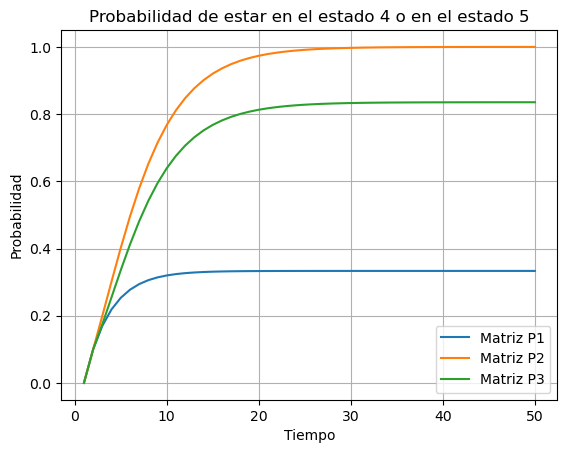

In [27]:
# Finalmente puede graficar 

plt.plot(np.arange(1,51),prob_falla_1,label="Matriz P1")
plt.plot(np.arange(1,51),prob_falla_2,label="Matriz P2")
plt.plot(np.arange(1,51),prob_falla_3,label="Matriz P3")
plt.xlabel("Tiempo") # Establecer el título del eje x
plt.ylabel("Probabilidad") # Establecer el título del eje y
plt.title('Probabilidad de estar en el estado 4 o en el estado 5')
plt.legend(loc='best')
plt.grid()